In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import *

In [29]:
bands = ['K', 'Ka', 'U']
#fname = 
file = np.loadtxt('./Files/U-LFS_to_fit.dat')

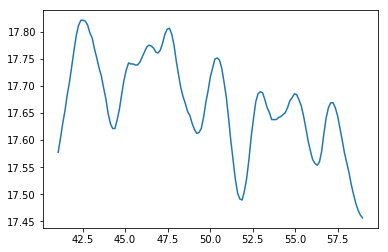

In [30]:
freq = file[:,0]
tau = file[:,1]*1e9
plt.plot(freq, tau)
plt.show()

Tg_corr[band, Fp] = A*EXP( B*Fp) + C*EXP( D*Fp)

In [23]:
def fitfunction(x, a, b, c):
    func = a*np.exp(b*x) + c#*np.exp(d*x)
    return func

In [24]:
#guess = [10.0, 1.0, 11.0, 1.0]
guess = [10.0, -1.0, 10.0]
#bounds = [(0.0, -10.0, 0.0, -10.0),(20.0, 0.0, 20.0, 0.0)]
popt, pcov = curve_fit(fitfunction, freq, tau, p0=guess)

/home/guimas/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


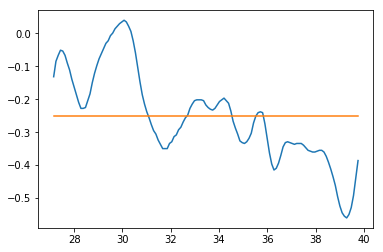

In [25]:
plt.plot(freq, tau, label='original')
plt.plot(freq, fitfunction(freq, *popt), label='fit')
plt.show()

FUNCTION aug_dispersion, band, side, A, B, F

    c=299792458.0; ms-1

    IF side EQ 0 THEN $
        antenna_offset = [0.0, 1.2, 1.0, 1.4]/100.0 $       ; HFS
    ELSE $
        antenna_offset = [4.7, 0.0, 3.7, 4.6]/100.0         ; LFS

    tgv = 2*antenna_offset[band-1]/c

    fc = [14.047, 21.081, 26.342, 39.863, 59.010];    Waveguide cutoff frequency

    RETURN, (tgv+A)+B/SQRT(1-(fc[band-1]/F)^2.0)

END

In [26]:
def ft2(x, a, b):
    return a + b/np.sqrt(1.0-(14.047/x)**2)

In [31]:
#guess = [10.0, 1.0, 11.0, 1.0]
#guess = [10.0, -1.0, 10.0]
#bounds = [(0.0, -10.0, 0.0, -10.0),(20.0, 0.0, 20.0, 0.0)]
#guess = [10.0, -100.0]
popt, pcov = curve_fit(ft2, freq, tau)#, p0=guess)

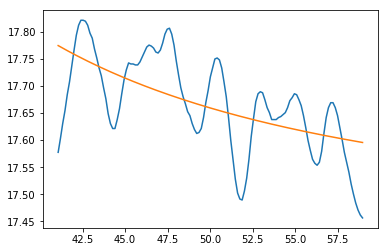

In [32]:
plt.plot(freq, tau, label='original')
plt.plot(freq, ft2(freq, *popt), label='fit')
plt.show()

In [33]:
popt

array([12.26840195,  5.17370554])